In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [4]:
#import the dataset
coke=pd.read_excel(r"C:\Users\Srividya\Downloads\quarter_sales_42.xlsx")
coke.head()

,Quarter,Sales
0,Q1_85,1734.827000
1,Q2_85,2244.960999
2,Q3_85,2533.804993
3,Q4_85,2154.962997
4,Q1_86,1547.818996


In [5]:
coke.shape

(42, 2)

In [6]:
coke.describe()

,Sales
count,42.000000
mean,2573.573411
std,575.184682
min,1547.818996
25%,2156.149275
50%,2539.499035
75%,2998.435325
max,3847.353571


In [7]:
coke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [8]:
#Converting the Quarter format to datetime format
from datetime import datetime
from dateutil import relativedelta


In [9]:
#Convert start and end dates to datetime format
start_date, end_date = 'March 1986', 'June 1996'

start_date = datetime.strptime(start_date, '%B %Y')
end_date   = datetime.strptime(end_date, '%B %Y')


In [10]:
#Calculate the difference between dates
delta = relativedelta.relativedelta(end_date, start_date)
delta


relativedelta(years=+10, months=+3)

In [11]:
delta.years, delta.months


(10, 3)

In [12]:
print("Years:", delta.years)
print("Months:", delta.months)


Years: 10
Months: 3


In [13]:
result = [
    (start_date + relativedelta.relativedelta(months=i)).strftime('%B %Y')
    for i in range(0, delta.years * 12 + delta.months + 1, 3)# we have quarterly data so 3 is time gap of 3 months
]
result

['March 1986',
 'June 1986',
 'September 1986',
 'December 1986',
 'March 1987',
 'June 1987',
 'September 1987',
 'December 1987',
 'March 1988',
 'June 1988',
 'September 1988',
 'December 1988',
 'March 1989',
 'June 1989',
 'September 1989',
 'December 1989',
 'March 1990',
 'June 1990',
 'September 1990',
 'December 1990',
 'March 1991',
 'June 1991',
 'September 1991',
 'December 1991',
 'March 1992',
 'June 1992',
 'September 1992',
 'December 1992',
 'March 1993',
 'June 1993',
 'September 1993',
 'December 1993',
 'March 1994',
 'June 1994',
 'September 1994',
 'December 1994',
 'March 1995',
 'June 1995',
 'September 1995',
 'December 1995',
 'March 1996',
 'June 1996']

one quarter is march to june then june to september is second quarter

In [14]:
#Assign the converted dates back to the dataframe
coke["quarter"] = result


In [15]:
quarter = []

for date in coke["quarter"]:
    values = datetime.strptime(date, '%B %Y')
    quarter.append(values)


In [16]:
quarter

[datetime.datetime(1986, 3, 1, 0, 0),
 datetime.datetime(1986, 6, 1, 0, 0),
 datetime.datetime(1986, 9, 1, 0, 0),
 datetime.datetime(1986, 12, 1, 0, 0),
 datetime.datetime(1987, 3, 1, 0, 0),
 datetime.datetime(1987, 6, 1, 0, 0),
 datetime.datetime(1987, 9, 1, 0, 0),
 datetime.datetime(1987, 12, 1, 0, 0),
 datetime.datetime(1988, 3, 1, 0, 0),
 datetime.datetime(1988, 6, 1, 0, 0),
 datetime.datetime(1988, 9, 1, 0, 0),
 datetime.datetime(1988, 12, 1, 0, 0),
 datetime.datetime(1989, 3, 1, 0, 0),
 datetime.datetime(1989, 6, 1, 0, 0),
 datetime.datetime(1989, 9, 1, 0, 0),
 datetime.datetime(1989, 12, 1, 0, 0),
 datetime.datetime(1990, 3, 1, 0, 0),
 datetime.datetime(1990, 6, 1, 0, 0),
 datetime.datetime(1990, 9, 1, 0, 0),
 datetime.datetime(1990, 12, 1, 0, 0),
 datetime.datetime(1991, 3, 1, 0, 0),
 datetime.datetime(1991, 6, 1, 0, 0),
 datetime.datetime(1991, 9, 1, 0, 0),
 datetime.datetime(1991, 12, 1, 0, 0),
 datetime.datetime(1992, 3, 1, 0, 0),
 datetime.datetime(1992, 6, 1, 0, 0),
 datet

In [17]:
coke["date"] = quarter

In [18]:
coke.head()

,Quarter,Sales,quarter,date
0,Q1_85,1734.827000,March 1986,1986-03-01
1,Q2_85,2244.960999,June 1986,1986-06-01
2,Q3_85,2533.804993,September 1986,1986-09-01
3,Q4_85,2154.962997,December 1986,1986-12-01
4,Q1_86,1547.818996,March 1987,1987-03-01


In [19]:
coke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Quarter  42 non-null     object        
 1   Sales    42 non-null     float64       
 2   quarter  42 non-null     object        
 3   date     42 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.4+ KB


In [20]:
import warnings
from statsmodels.tools.sm_exceptions import ValueWarning

warnings.filterwarnings("ignore", category=ValueWarning)

coke = coke.sort_values('date')



In [21]:
#we need only sales and datetime column i.e date
#so drop other two columns
coke.drop(['Quarter', 'quarter'], axis=1, inplace=True)
coke.head()

,Sales,date
0,1734.827000,1986-03-01
1,2244.960999,1986-06-01
2,2533.804993,1986-09-01
3,2154.962997,1986-12-01
4,1547.818996,1987-03-01


In [22]:
#Setting date as index
coke.set_index('date', inplace=True)


In [23]:
coke.head()

,Sales
date,
1986-03-01,1734.827000
1986-06-01,2244.960999
1986-09-01,2533.804993
1986-12-01,2154.962997
1987-03-01,1547.818996


In [24]:
coke = coke.asfreq('QS-DEC')

print(coke.index.freq)


<QuarterBegin: startingMonth=12>


<Axes: xlabel='date'>

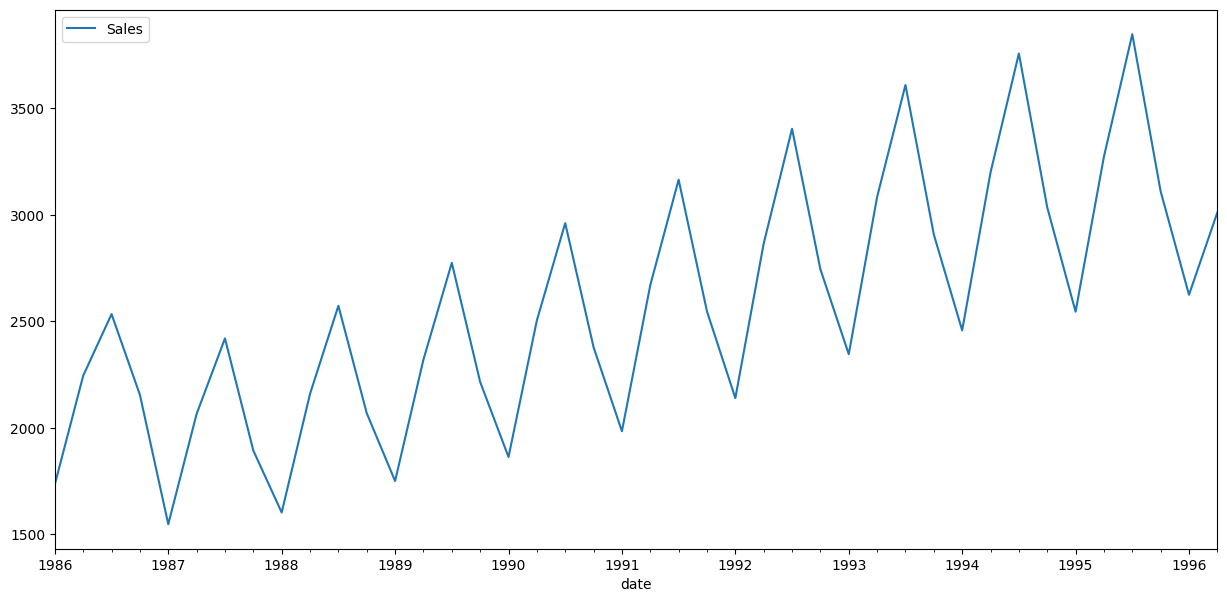

In [25]:
#visualize
coke.plot(figsize=(15,7))

In [26]:
# Defining a function to use ADF test
from statsmodels.tsa.stattools import adfuller
def adfuller_test(saless):
    result = adfuller(saless)
    labels = ['ADF Test Statistic', 'p-values', '#Lags Used', 'Number of observations used']
    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))
    if result[1] <= 0.05:
        print("The data is stationary")
    else:
        print("The data is not stationary")

adfuller_test(coke['Sales'])



ADF Test Statistic : -2.3409627733797826
p-values : 0.15909668489512935
#Lags Used : 6
Number of observations used : 35
The data is not stationary


In [27]:
adf_result = adfuller(coke['Sales'])
adf_result

(-2.3409627733797826,
 0.15909668489512935,
 6,
 35,
 {'1%': -3.6327426647230316,
  '5%': -2.9485102040816327,
  '10%': -2.6130173469387756},
 351.7555199709393)

In [28]:
#decomposed result data cannot be applied to adfuller test
#data is not stationary so diff it
coke_diff = coke.diff(periods=1)
coke_diff.head()

,Sales
date,
1986-03-01,NaN
1986-06-01,510.133999
1986-09-01,288.843994
1986-12-01,-378.841996
1987-03-01,-607.144001


In [29]:
#again use adf test
adfuller_test(coke_diff['Sales'].dropna())

ADF Test Statistic : -1.8685283402549413
p-values : 0.3470080737320326
#Lags Used : 5
Number of observations used : 35
The data is not stationary


<Axes: xlabel='date'>

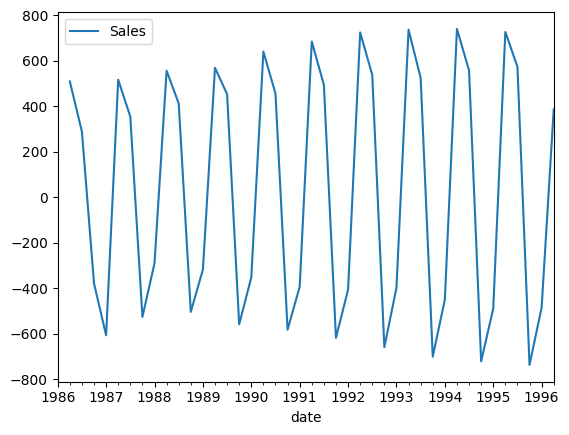

In [30]:
coke_diff.plot()

here mean is constant but still there is some seasonality so its not stationary so we regular diff it

In [31]:
# another order of differencing
coke_diff2 = coke_diff.diff(periods=1)
coke_diff2.head()


,Sales
date,
1986-03-01,NaN
1986-06-01,NaN
1986-09-01,-221.290005
1986-12-01,-667.685990
1987-03-01,-228.302005


In [32]:
adfuller_test(coke_diff2['Sales'].dropna())

ADF Test Statistic : -17.482421994450036
p-values : 4.481869715928274e-30
#Lags Used : 2
Number of observations used : 37
The data is stationary


<Axes: xlabel='date'>

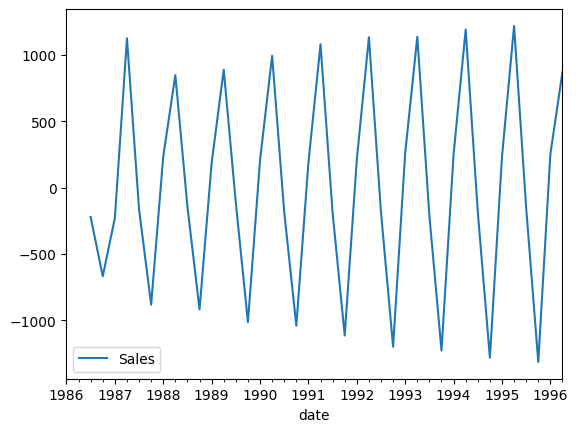

In [33]:
coke_diff2.plot()

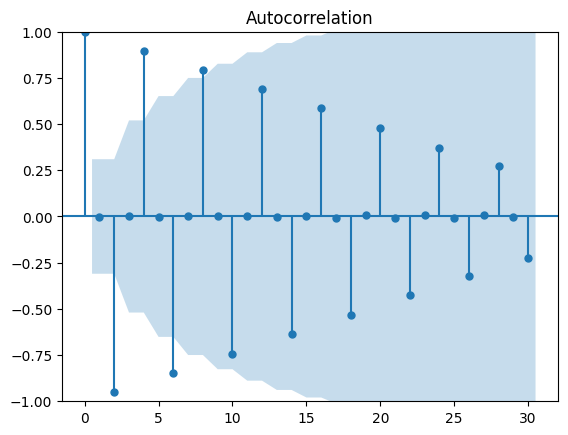

In [34]:
#plot auto correlation and partial auto correlation plots
#find acf and pacf plot to find q and p value .here we build ma model so we find q value
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(coke_diff2['Sales'].dropna(),lags=30)
plt.show()

q value is 2

at every 4 th lag there is a peak which identifies significant lags at every 4 th lag there is a significant lag since its a quarterly data

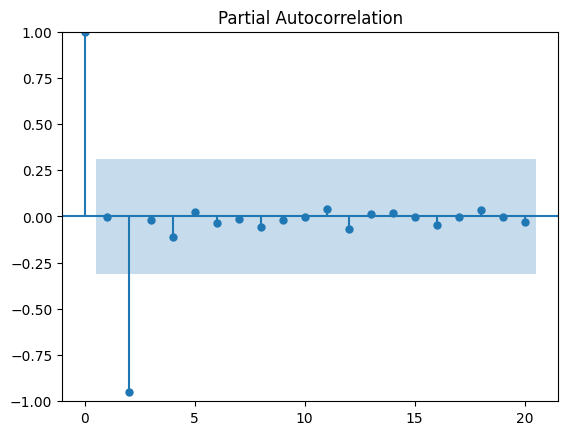

In [35]:
plot_pacf(coke_diff2['Sales'].dropna(),lags=20)
plt.show()

p value is 2

we cant take 4 th lag since its quarterly data becoz every 4 th lag is always significant and choose minimum number of lags to avoid model complexity of overfitting

# MODEL BUILDING

AR MODEL


In [36]:
#model building
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(coke['Sales'], order=(2,2,0))
model_fit = model.fit()

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   42
Model:                 ARIMA(2, 2, 0)   Log Likelihood                -262.072
Date:                Wed, 10 Dec 2025   AIC                            530.144
Time:                        13:43:56   BIC                            535.210
Sample:                    03-01-1986   HQIC                           531.975
                         - 06-01-1996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0196      0.041     -0.473      0.636      -0.101       0.062
ar.L2         -0.9746      0.029    -33.406      0.000      -1.032      -0.917
sigma2      2.453e+04   3585.652      6.841      0.0

In [37]:
model_fit.aic

530.1435313026998

MA MODEL


In [38]:
model = ARIMA(coke['Sales'], order=(0,2,2))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   42
Model:                 ARIMA(0, 2, 2)   Log Likelihood                -300.471
Date:                Wed, 10 Dec 2025   AIC                            606.941
Time:                        13:43:56   BIC                            612.008
Sample:                    03-01-1986   HQIC                           608.773
                         - 06-01-1996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0023      3.573     -0.001      0.999      -7.006       7.002
ma.L2         -0.9977      0.334     -2.989      0.003      -1.652      -0.343
sigma2      1.707e+05   2.01e-05   8.48e+09      0.0

In [39]:
model_fit.aic

606.9410352819832

ARIMA MODEL


In [40]:
#model building
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(coke['Sales'], order=(2,2,2))
model_fit = model.fit()

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   42
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -245.578
Date:                Wed, 10 Dec 2025   AIC                            501.157
Time:                        13:43:56   BIC                            509.601
Sample:                    03-01-1986   HQIC                           504.210
                         - 06-01-1996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0153      0.029      0.522      0.602      -0.042       0.073
ar.L2         -0.9934      0.014    -71.801      0.000      -1.020      -0.966
ma.L1         -1.1429      1.331     -0.859      0.3

In [41]:
model_fit.aic

501.1568954238993

EVEN THOUGH AIC VALUE IS LOW AND ITS BEST MODEL PUT MOST OF P VALUES ARE HIGH WHIVH WILL INCREASE MODEL COMPLEXITY SO RECHECK WITH DIFF ORDER VALUES

In [43]:
#ARIMA MODEL WITH DIFF Q VALUES 
pdq = []
aic = []

p=2
d=2


for q in range(12):
    try:
        model = ARIMA(coke['Sales'], order=(p,d,q)).fit()
        pdq.append((p, d, q))
        aic.append(model.aic)
    except:
        pass

keys = pdq
values = aic
d = dict(zip(keys, values))
print(d)


C:\Users\Srividya\Anaconda3\envs\chatbotenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Srividya\Anaconda3\envs\chatbotenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Srividya\Anaconda3\envs\chatbotenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Srividya\Anaconda3\envs\chatbotenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Srividya\Anacon

{(2, 2, 0): 530.1435313026998, (2, 2, 1): 510.31001428901925, (2, 2, 2): 501.1568954238993, (2, 2, 3): 499.8762873444563, (2, 2, 4): 497.35203384464046, (2, 2, 5): 497.6875088326706, (2, 2, 6): 498.0348092439099, (2, 2, 7): 498.7816463727331, (2, 2, 8): 505.9534645462801, (2, 2, 9): 519.3379158915587, (2, 2, 10): 556.8074559104209, (2, 2, 11): 538.1140688648646}


C:\Users\Srividya\Anaconda3\envs\chatbotenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [44]:
coke.shape

(42, 1)

<Axes: xlabel='date'>

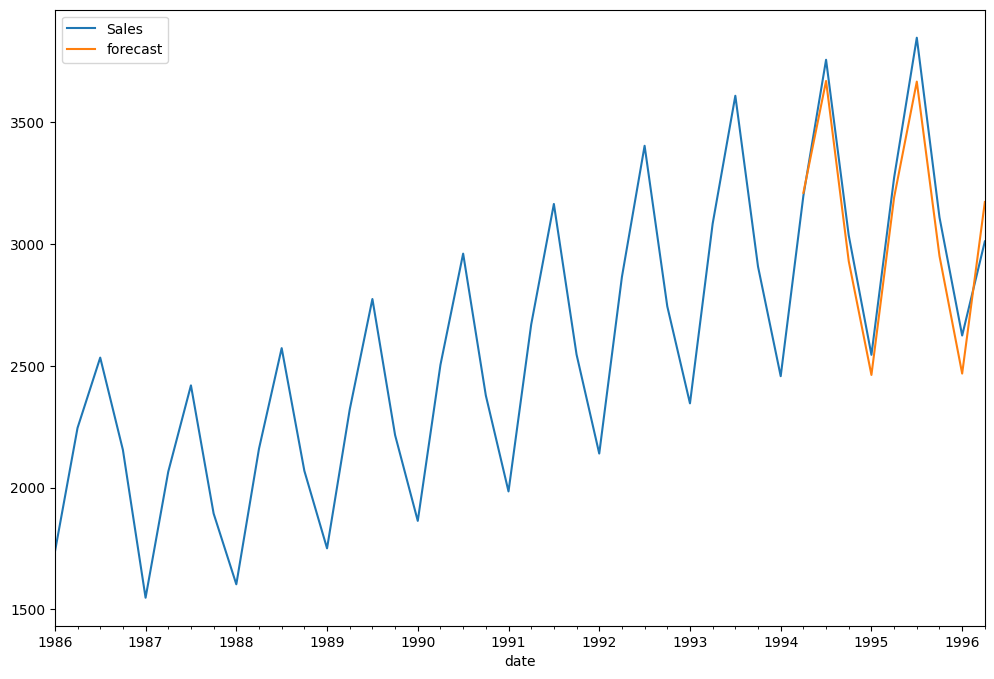

In [45]:
# predicting values for this model
coke['forecast'] = model_fit.predict(start=33, end=43, dynamic=True)

# plot both actual and forecast
coke[['Sales', 'forecast']].plot(figsize=(12,8))


if actual values and predicted values are not matched like above if prediction has non seasonal stationarity waves or output then we should do SARIMAX model

for now above ARIMA MODEL GIVEN ALSO BEST MODEL RESULTS

THERE WAS sesonality in both acf and pacf plots at every 4 th lag and its significant so we can take from them p=4 and q-4 and build seasonality SARIMAX model change seasonal order and month is 4

SARIMAX MODEL

In [46]:
#so far we built ARIMA MODEL NOW LETS BUILD SARIMAX MODEL TO PREDICT VALUES
import statsmodels.api as sm


In [47]:
model=sm.tsa.statespace.SARIMAX(coke['Sales'],order=(2,2,2),seasonal_order=(4,2,4,4))#seasonal order only changed
results=model.fit()
#the optimizer didn’t properly converge.”

C:\Users\Srividya\Anaconda3\envs\chatbotenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='date'>

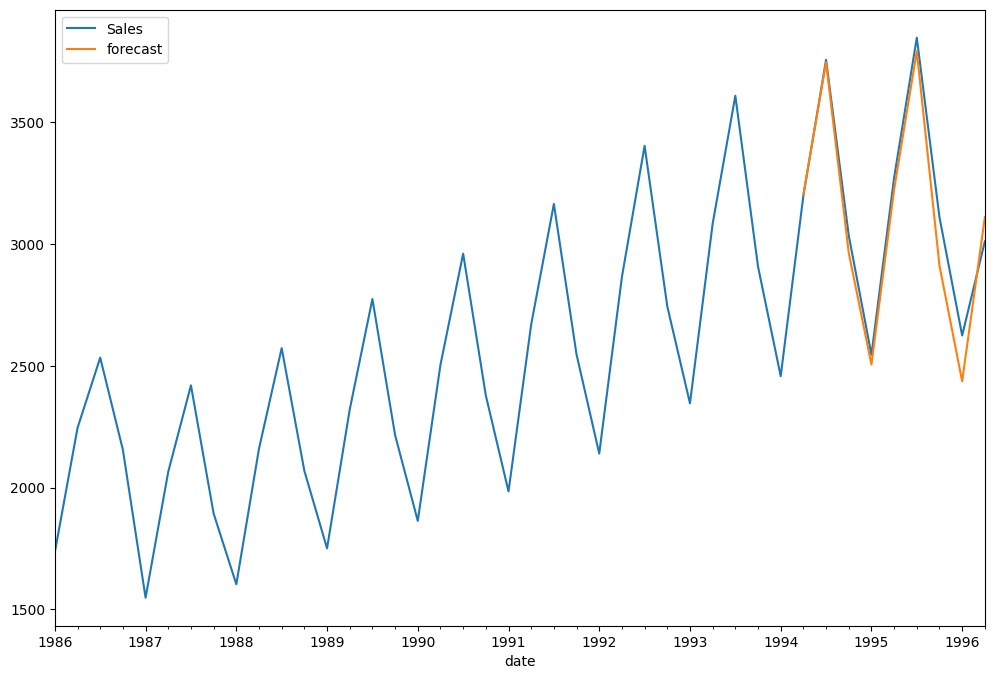

In [48]:
# predicting values for this model
coke['forecast'] = results.predict(start=33, end=43, dynamic=True)

# plot both actual and forecast
coke[['Sales', 'forecast']].plot(figsize=(12,8))


SARIMAX ALSO PERFORMS WELL

In [49]:
#Forecasting the future values
start_date, end_date = 'September 1986', 'June 1998'

start_date = datetime.strptime(start_date, '%B %Y')
end_date   = datetime.strptime(end_date, '%B %Y')

delta = relativedelta.relativedelta(end_date, start_date)
result = [datetime.strftime(start_date + relativedelta.relativedelta(months=i),
                            "%B %Y")
          for i in range(0, delta.years * 12 + delta.months + 1, 3)]


In [51]:
#Convert values into datetime format
quarter = []

for date in result:
    values = datetime.strptime(date, "%B %Y")
    quarter.append(values)


In [52]:
#Create future dates dataframe
future_dates_df = pd.DataFrame(index=quarter, columns=coke.columns)


In [53]:
#Concatenate with existing data
future_df = pd.concat([coke, future_dates_df], axis=0)
future_df.tail()


,Sales,forecast
1997-06-01,NaN,NaN
1997-09-01,NaN,NaN
1997-12-01,NaN,NaN
1998-03-01,NaN,NaN
1998-06-01,NaN,NaN


In [54]:
future_df.shape

(90, 2)

<Axes: >

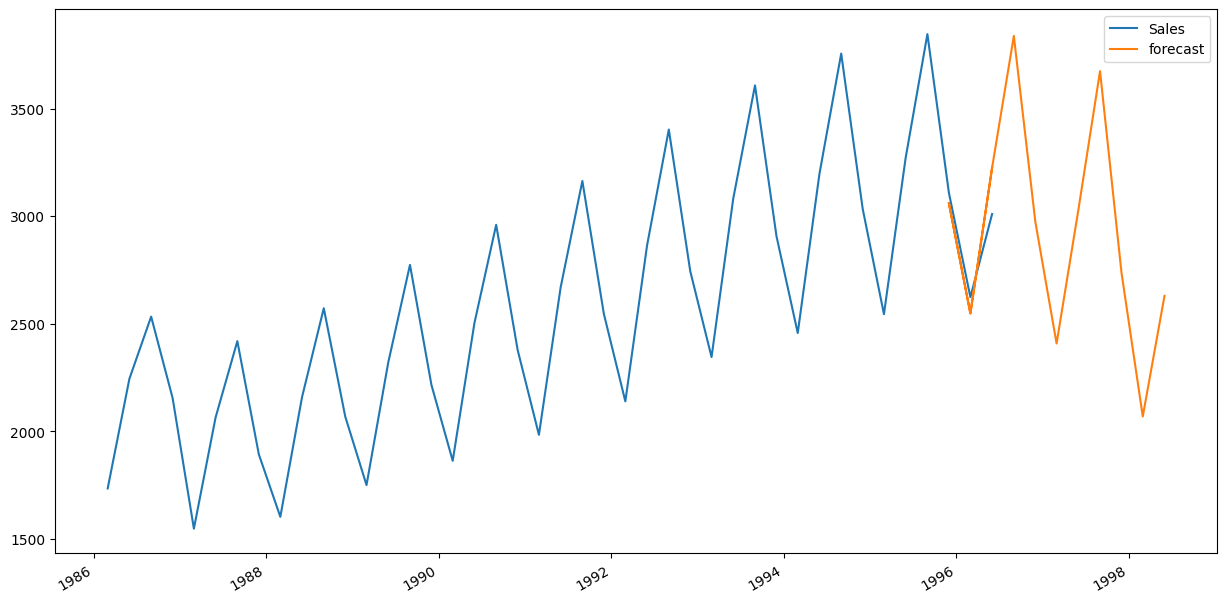

In [57]:
#Forecasting next two quarters
future_df['forecast'] = results.predict(start=39, end=51, dynamic=True)
future_df[['Sales', 'forecast']].plot(figsize=(15,8))


In [59]:
#forecasted values follows both trend and seasonality of original data
#forecast values of 2 future years
future_df['forecast'].iloc[41:]


1996-06-01    3226.504395
1986-09-01            NaN
1986-12-01            NaN
1987-03-01            NaN
1987-06-01            NaN
1987-09-01            NaN
1987-12-01            NaN
1988-03-01            NaN
1988-06-01            NaN
1988-09-01            NaN
1988-12-01            NaN
1989-03-01            NaN
1989-06-01            NaN
1989-09-01            NaN
1989-12-01            NaN
1990-03-01            NaN
1990-06-01            NaN
1990-09-01            NaN
1990-12-01            NaN
1991-03-01            NaN
1991-06-01            NaN
1991-09-01            NaN
1991-12-01            NaN
1992-03-01            NaN
1992-06-01            NaN
1992-09-01            NaN
1992-12-01            NaN
1993-03-01            NaN
1993-06-01            NaN
1993-09-01            NaN
1993-12-01            NaN
1994-03-01            NaN
1994-06-01            NaN
1994-09-01            NaN
1994-12-01            NaN
1995-03-01            NaN
1995-06-01            NaN
1995-09-01            NaN
1995-12-01  

In [60]:
#filling nan values above dates

In [61]:
# length of original data and full data
n_train = len(coke)
n_total = len(future_df)

# predict from last observed point up to last future point
pred = results.predict(start=n_train-1, end=n_total-1, dynamic=True)

# put predictions into forecast column
future_df['forecast'] = pred.values


ValueError: Length of values (49) does not match length of index (90)

first identify pdq values for order then build multiple models

In [62]:
import numpy as np

n_train  = len(coke)        # 42
n_total  = len(future_df)   # 90
n_future = n_total - n_train   # 48

# 1) create an empty forecast column
future_df['forecast'] = np.nan

# 2) get predictions ONLY for the future points
#    For ARIMA in statsmodels:
#    start = index after last observed point
#    end   = last future point
pred_future = results.predict(
    start=n_train,                      # 42
    end=n_train + n_future - 1,         # 42 + 48 - 1 = 89
    dynamic=True
)

print(len(pred_future), n_future)  # they should be equal (48, 48)

# 3) put those predictions in the tail of future_df
future_df.loc[future_df.index[n_train:], 'forecast'] = pred_future.values


48 48


ValueError: Must have equal len keys and value when setting with an iterable

do fill sales values in future prediction and also future values with date orders correctly till extends to forecast future values too do this task 